<a href="https://colab.research.google.com/github/bugraeroglu/MusicListify/blob/main/MusicListify_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


file_path = '/StreamingHistory_music_1.xlsx'
df = pd.read_excel(file_path)


print(df.head())


            endTime      artistName                       trackName  msPlayed
0  2023-10-05 11:59    mor ve ötesi                          Cambaz         0
1  2023-10-05 11:59  Yüksek Sadakat  Belki Üstümüzden Bir Kuş Geçer      2160
2  2023-10-05 11:59           Model                             Mey       210
3  2023-10-05 11:59  Emir Can İğrek                    Müzik Kutusu         0
4  2023-10-05 11:59       Money Man             24 (feat. Lil Baby)         0


In [ ]:

print("\nData types and missing values:")
print(df.info())



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     3206 non-null   object
 1   artistName  3206 non-null   object
 2   trackName   3206 non-null   object
 3   msPlayed    3206 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 100.3+ KB
None


In [ ]:

print("\nSummary statistics for numerical columns:")
print(df.describe())



Summary statistics for numerical columns:
            msPlayed
count    3206.000000
mean   100716.094822
std     93722.686430
min         0.000000
25%      3871.500000
50%     95007.500000
75%    175648.750000
max    448186.000000


In [ ]:
#Data transformation

print("\nTime range of the dataset:")
print("Min Time:", df['endTime'].min())
print("Max Time:", df['endTime'].max())



Time range of the dataset:
Min Time: 2023-10-05 11:59
Max Time: 2024-01-10 22:51


In [67]:
pip install matplotlib seaborn


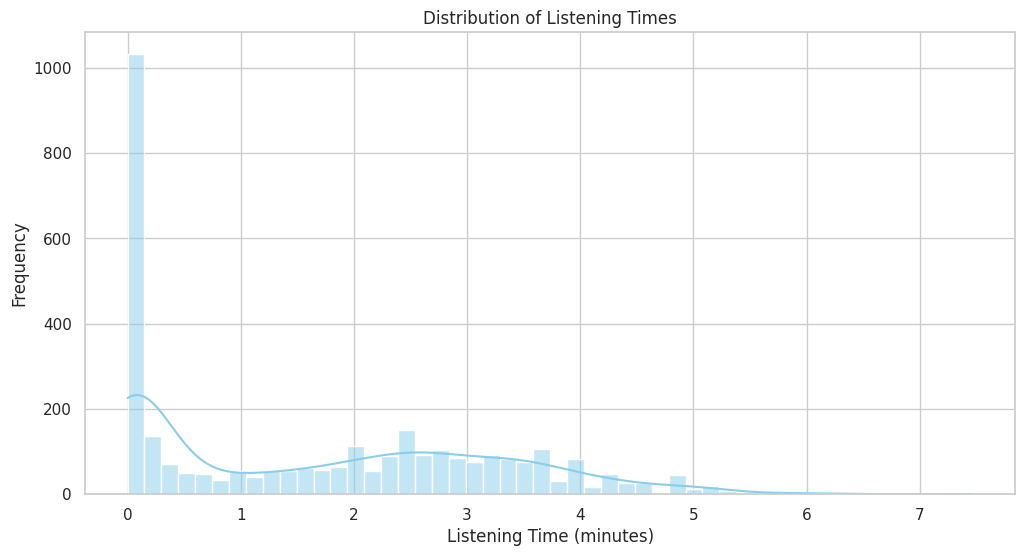

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.histplot(df['msPlayed'] / 60000, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Listening Times')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-18-580e0737de24>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


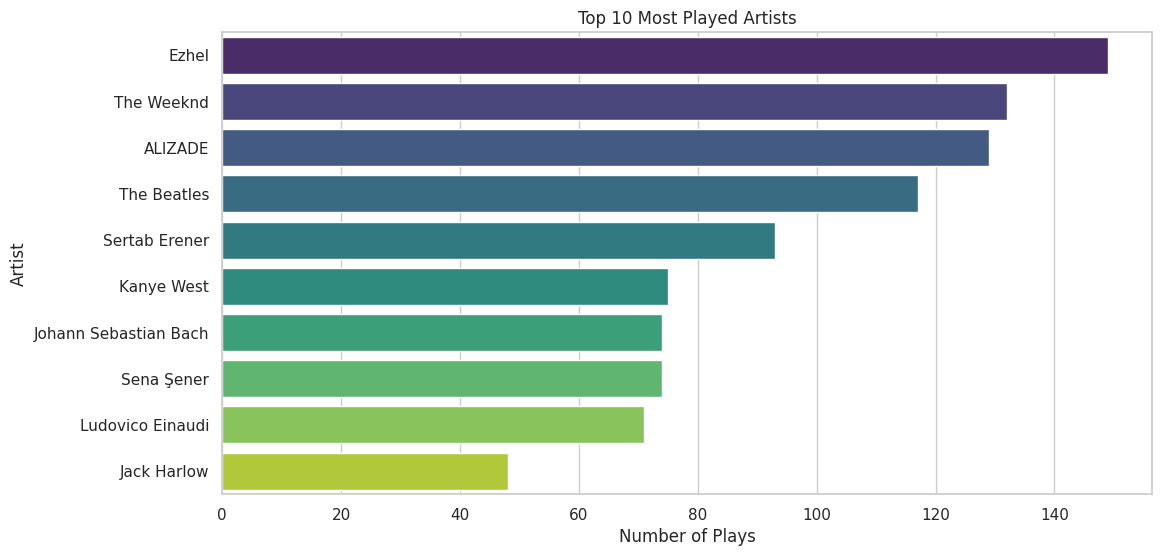

In [ ]:

top_n = 10


top_artists = df['artistName'].value_counts().head(top_n)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title(f'Top {top_n} Most Played Artists')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')
plt.show()


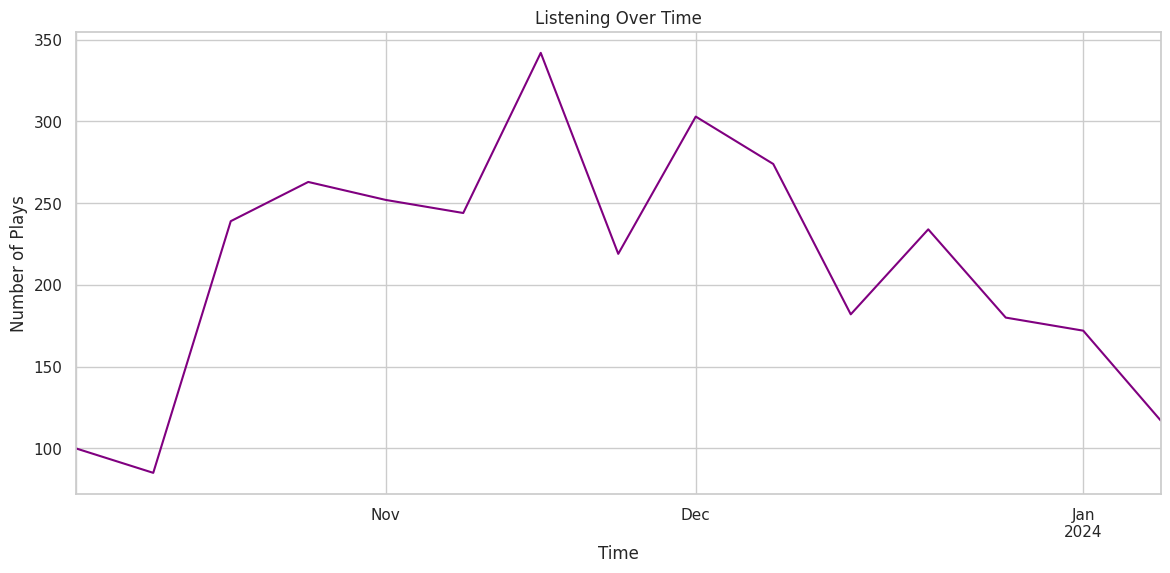

In [ ]:

df['endTime'] = pd.to_datetime(df['endTime'])


time_freq = 'W'


listening_over_time = df.resample(time_freq, on='endTime').size()


plt.figure(figsize=(14, 6))
listening_over_time.plot(color='purple')
plt.title('Listening Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Plays')
plt.show()


<ipython-input-21-73ad1270a24e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=days_order, palette='muted')


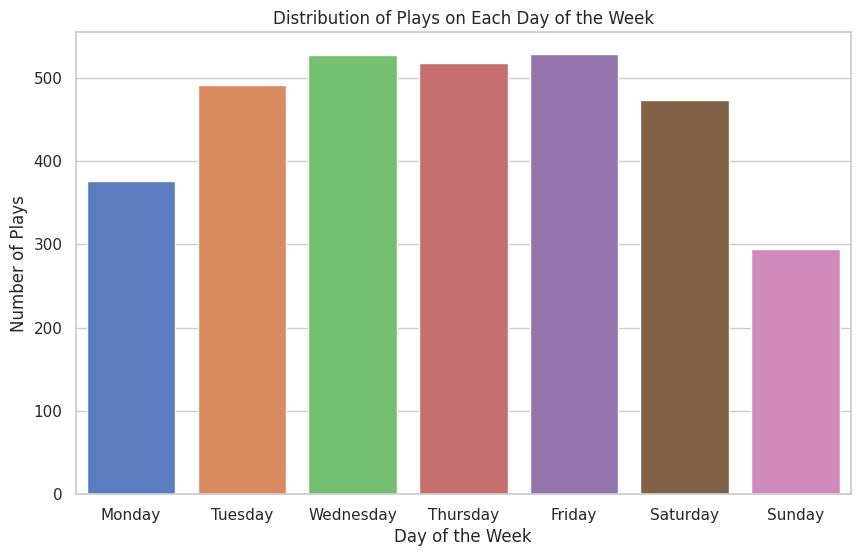

In [ ]:

df['day_of_week'] = df['endTime'].dt.day_name()


days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=days_order, palette='muted')
plt.title('Distribution of Plays on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Plays')
plt.show()


<ipython-input-22-709902884fe7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='Set2')


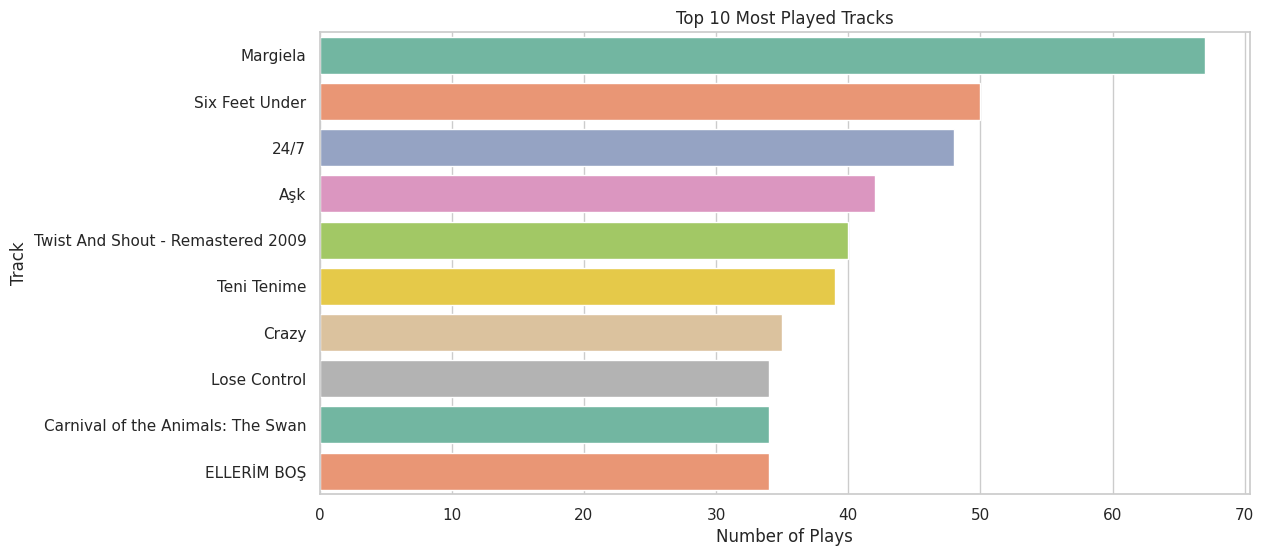

In [ ]:

top_n_tracks = 10


top_tracks = df['trackName'].value_counts().head(top_n_tracks)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='Set2')
plt.title(f'Top {top_n_tracks} Most Played Tracks')
plt.xlabel('Number of Plays')
plt.ylabel('Track')
plt.show()


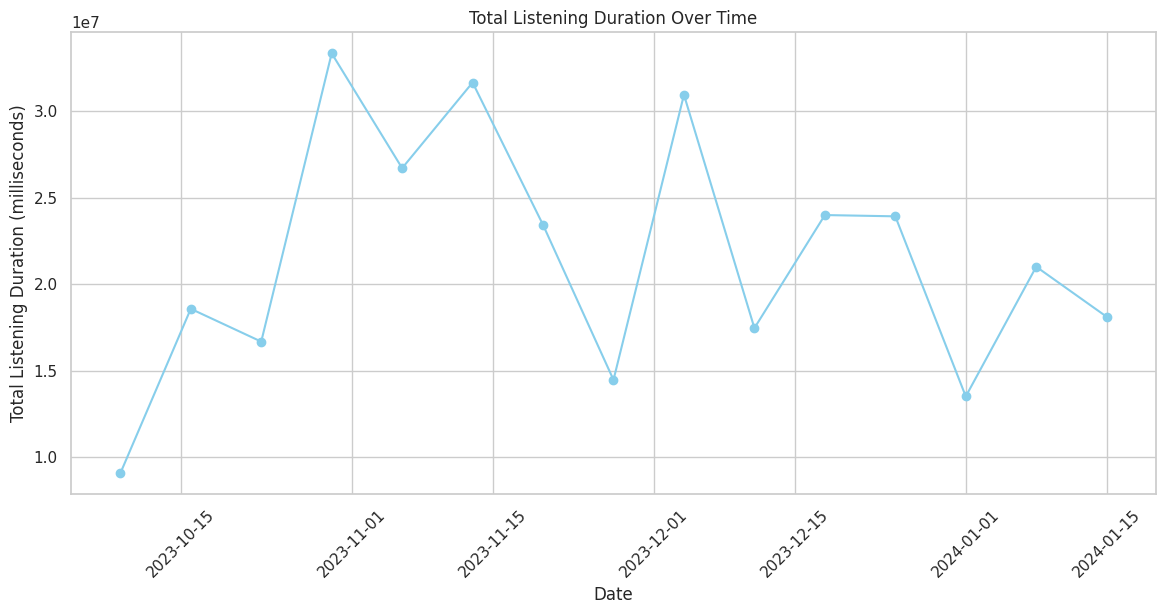

In [ ]:

weekly_listen_duration = df.resample('W-Mon', on='endTime')['msPlayed'].sum()


plt.figure(figsize=(14, 6))
plt.plot(weekly_listen_duration.index, weekly_listen_duration.values, marker='o', linestyle='-', color='skyblue')
plt.title('Total Listening Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Listening Duration (milliseconds)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-7c921c2dce66>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('day_of_week', 'endTime', 'msPlayed')


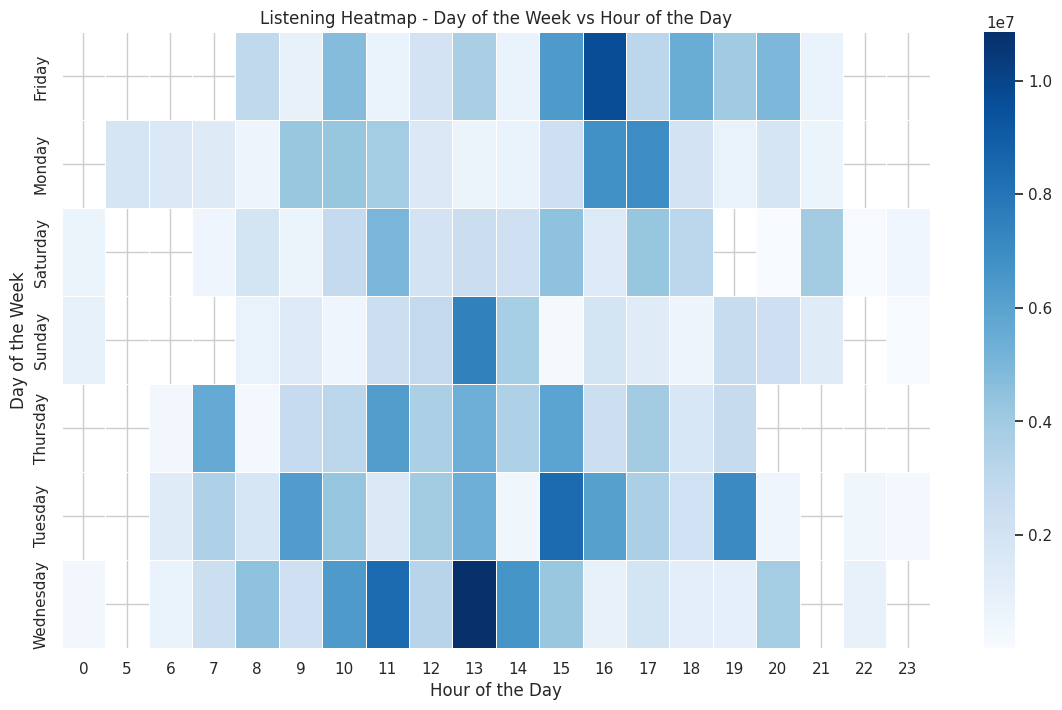

In [ ]:

heatmap_data = df.groupby(['day_of_week', df['endTime'].dt.hour])['msPlayed'].sum().reset_index()
heatmap_data = heatmap_data.pivot('day_of_week', 'endTime', 'msPlayed')


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5)
plt.title('Listening Heatmap - Day of the Week vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


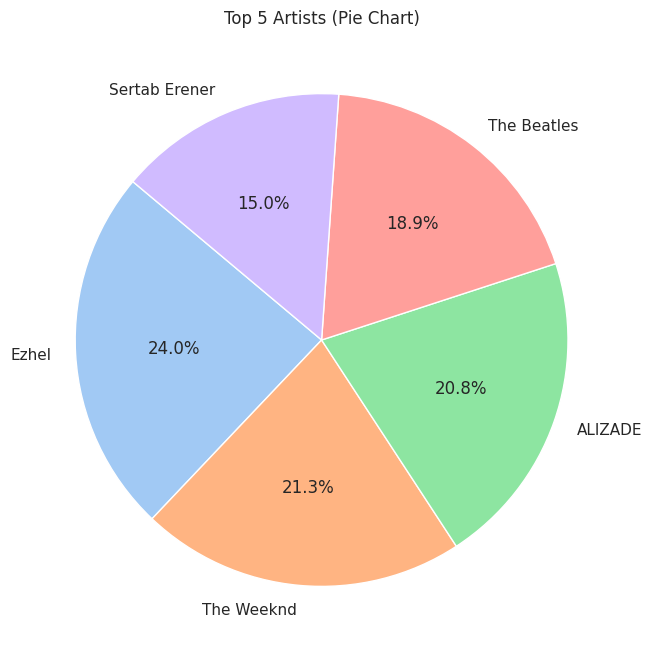

In [ ]:

top_n_artists_pie = 5


top_artists_pie = df['artistName'].value_counts().head(top_n_artists_pie)

plt.figure(figsize=(8, 8))
plt.pie(top_artists_pie, labels=top_artists_pie.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title(f'Top {top_n_artists_pie} Artists (Pie Chart)')
plt.show()



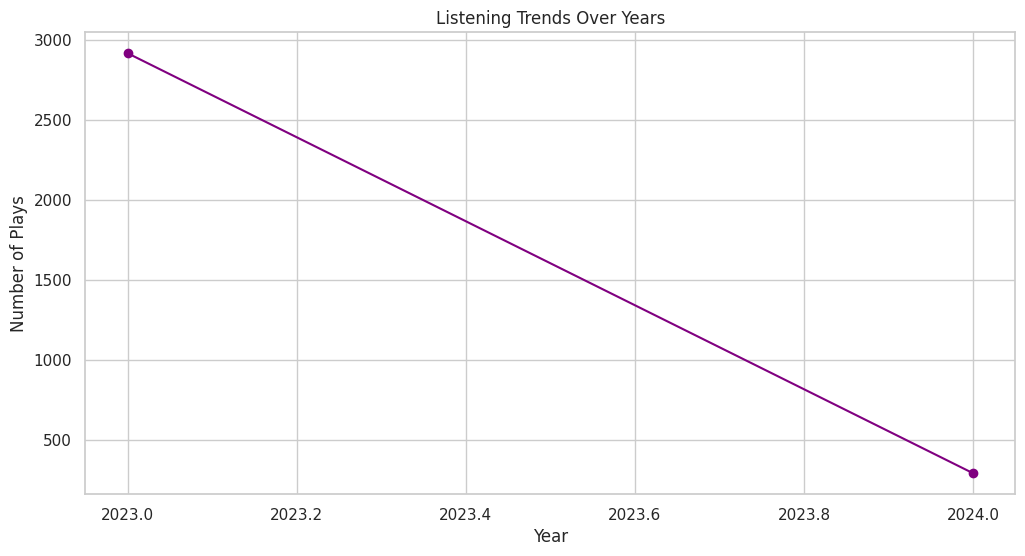

In [ ]:

df['year'] = df['endTime'].dt.year


yearly_trends = df.groupby('year')['msPlayed'].count()

plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='purple')
plt.title('Listening Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


data = [
    {"artistName": "mor ve ötesi", "trackName": "Cambaz", "genre": "Rock"},
    {"artistName": "Yüksek Sadakat", "trackName": "Belki Üstümüzden Bir Kuş Geçer", "genre": "Rock"},
    {"artistName": "Model", "trackName": "Mey", "genre": "Pop"},
    # ...
]


df = pd.DataFrame(data)


df['features'] = df['artistName'] + " " + df['trackName']


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['features'])


y = df['genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

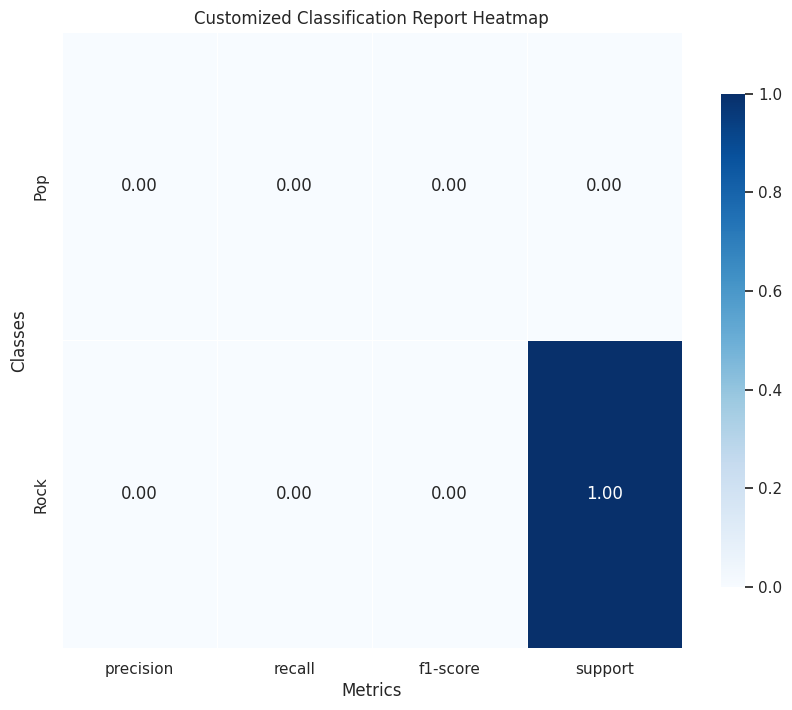

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt




report = classification_report(y_test, y_pred, output_dict=True)


df_report = pd.DataFrame(report).transpose()


metrics_for_heatmap = df_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)


plt.figure(figsize=(10, 8))
sns.heatmap(metrics_for_heatmap, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, cbar_kws={"shrink": 0.8})


plt.title('Customized Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


data = {'feature1': [1, 2, 3, 4, 5],
        'feature2': [5, 4, 3, 2, 1],
        'target': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)
target = df['target']


X = df.drop('target', axis=1)
y = target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 1.210000000000003
